In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def first_order(t, k, c):
    return c * np.exp(-k * t)

In [33]:
t = np.arange(2, 22, 2)
h2o2 = [6.23, 4.84, 3.76, 3.20, 2.60, 2.16, 1.85, 1.49, 1.27, 1.01]

<ErrorbarContainer object of 3 artists>

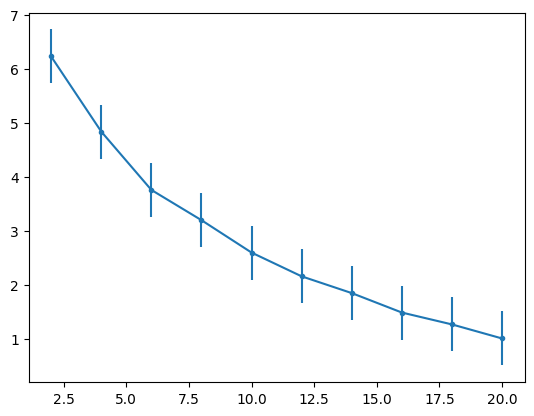

In [34]:
plt.errorbar(t, h2o2, np.ones_like(h2o2) * 0.5, marker='.')

In [35]:
from scipy.optimize import curve_fit

In [36]:
curve_fit(first_order, t, h2o2)

/var/folders/b2/d1yfnqn51dj0lwhm3mjhgchr0000gq/T/ipykernel_41106/4035870588.py:2: RuntimeWarning: overflow encountered in exp
  return c * np.exp(-k * t)


(array([0.10308257, 7.42164476]),
 array([[9.53801482e-06, 3.95693672e-04],
        [3.95693672e-04, 2.50870014e-02]]))

In [40]:
T = np.arange(2, 22, 2)
scale = 0.5
size = int(2 ** 15)
At = rng.normal(loc=first_order(T[:, np.newaxis], k, 7.5), scale=scale, size=(T.size, size))
has_zero = np.where(At < 0)[1]
while has_zero.size > 0:
    At[:, has_zero] = rng.normal(loc=first_order(T[:, np.newaxis], At, 7.5), scale=scale, size=(T.size, has_zero.size))
    has_zero = np.where(At <= 0)[1]

NameError: name 'k' is not defined

/var/folders/b2/d1yfnqn51dj0lwhm3mjhgchr0000gq/T/ipykernel_41106/4035870588.py:2: RuntimeWarning: overflow encountered in exp
  return c * np.exp(-k * t)


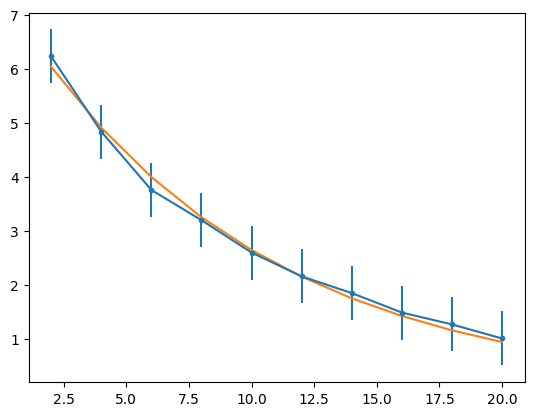

In [37]:
plt.errorbar(t, h2o2, np.ones_like(h2o2) * 0.5, marker='.')
plt.plot(t, first_order(t, *curve_fit(first_order, t, h2o2)[0]))

In [39]:
rng = np.random.default_rng(1)

In [3]:
def second_order(t, a0, k):
    return 1 / ((1 / a0) + k * t)

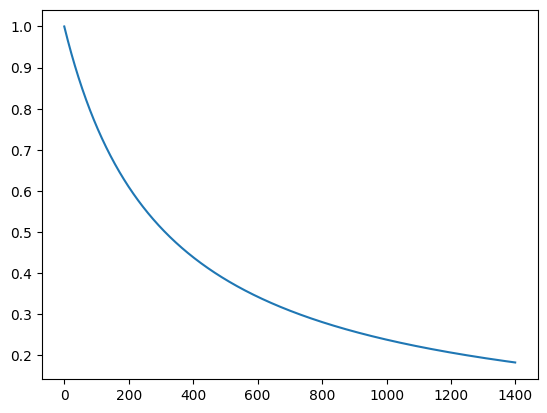

In [4]:
t = np.arange(0, 1400, 1)
plt.plot(t, second_order(t, 1, 3.2e-3))

In [5]:
tt = np.arange(0, 1400, 200)
tt

array([   0,  200,  400,  600,  800, 1000, 1200])

In [6]:
scale = 0.04

In [7]:
second_order(tt[:, np.newaxis], 1, 3.2e-3)

array([[1.        ],
       [0.6097561 ],
       [0.43859649],
       [0.34246575],
       [0.28089888],
       [0.23809524],
       [0.20661157]])

In [8]:
A = rng.normal(loc=second_order(tt[:, np.newaxis], 1, 3.2e-3), scale=scale, size=(tt.size, 2 ** 14))

In [9]:
A.mean(1), A.std(1)

(array([0.99961192, 0.60936362, 0.43830661, 0.34227227, 0.28123264,
        0.23798442, 0.20660392]),
 array([0.03979607, 0.03945191, 0.04020227, 0.0398966 , 0.04019808,
        0.03975411, 0.04033968]))

<ErrorbarContainer object of 3 artists>

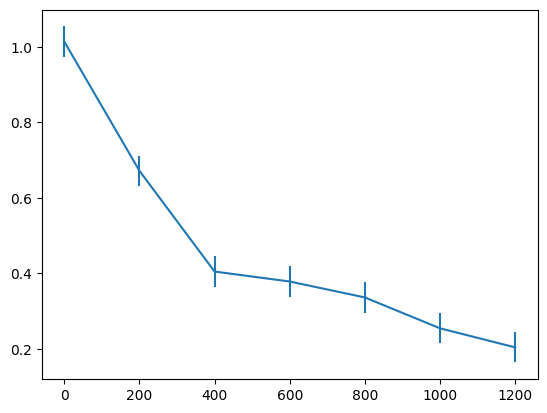

In [10]:
plt.errorbar(tt, A[:, 0], scale)

In [50]:
errorbars = 1 / np.array([A[:, 0] - scale, A[:, 0] + scale])

<ErrorbarContainer object of 3 artists>

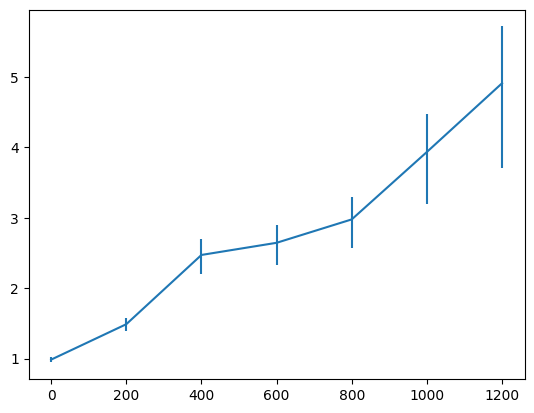

In [59]:
plt.errorbar(tt, 1/A[:, 0], np.abs(errorbars - 1 / A[:, 0]))

In [57]:
errorbars

array([[1.02688027, 1.58337939, 2.74257498, 2.95661683, 3.37811759,
        4.66714324, 6.10651704],
       [0.94892563, 1.40536173, 2.24910734, 2.39106079, 2.65941285,
        3.39831093, 4.1024047 ]])

In [12]:
from scipy.stats import linregress

In [15]:
omega = np.eye(tt.size) * scale
omega

array([[0.04, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.04, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.04, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.04, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04]])

In [24]:
X = np.array([tt, np.ones_like(tt)]).T
W = np.linalg.inv(omega)

In [33]:
wls = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ (1/A)

In [34]:
wls[0]

array([0.00306364, 0.00394181, 0.00468116, ..., 0.00353417, 0.0042475 ,
       0.00377212])

In [35]:
wls.mean(1)

array([0.00336668, 0.97029682])

In [36]:
wls[0].min()

0.0017513952088026323

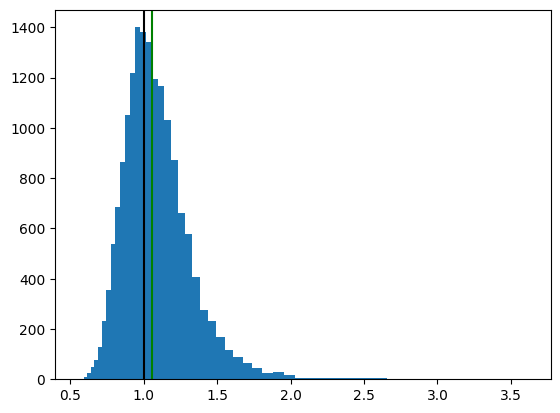

In [37]:
ll = wls[0] / 3.2e-3
plt.hist(ll, bins=np.geomspace(ll.min(), ll.max(), 50))
# plt.xscale('log')
plt.axvline(ll.mean(), color='g')
plt.axvline(1, color='k')
# plt.axvline(ols_[0].mean(), color='b')
plt.show()

In [38]:
wls[0].mean()

0.0033666807912720942

In [41]:
from scipy.optimize import curve_fit

In [47]:
np.ones_like(tt)

array(1)

In [46]:
np.ones_like(tt.size) * scale

0.04

In [48]:
Ea_non = np.array([])
for i, j in enumerate(A.T):
    popt, pcov = curve_fit(second_order, tt, j, sigma=np.ones_like(tt) * scale, p0=[100, 3e-5])
    Ea_non = np.append(Ea_non, popt[1])

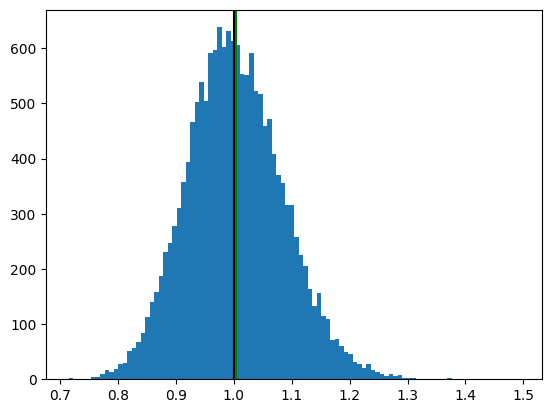

In [49]:
plt.hist(Ea_non / 3.2e-3, bins=100)
plt.axvline(1, color='k')
plt.axvline((Ea_non / 3.2e-3).mean(), color='g')
plt.show()